# Task 3 - Part A: Classification (Decision Tree)

In [59]:

# Task 3: Classification (Decision Tree Example)

# This script trains a Decision Tree classifier on the preprocessed
# Iris dataset, evaluates it with accuracy/precision/recall/F1,
# and generates visualizations.


# --- Step 1: Import required libraries ---
import pandas as pd                                     # For handling tabular data
from sklearn.model_selection import train_test_split    # For splitting into train/test sets
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Decision Tree classifier & visualization
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix
)
import seaborn as sns                                   # For visualization (heatmap of confusion matrix)
import matplotlib.pyplot as plt                         # For plotting

# --- Step 2: Load the preprocessed dataset ---
# This CSV should come from Task 1 (contains scaled features + one-hot encoded labels)
df = pd.read_csv("iris_preprocessed.csv")

# --- Step 3: Separate features (X) and target labels (y) ---
# Features: first 4 columns (sepal length, sepal width, petal length, petal width)
X = df.iloc[:, 0:4]

# Labels: last 3 columns (species in one-hot encoded form)
y = df.iloc[:, 4:]

# Decode one-hot labels → get species names ("species_setosa", "species_versicolor", "species_virginica")
y_labels = y.idxmax(axis=1)  

# --- Step 4: Train/test split ---
# 80% for training, 20% for testing
# "stratify=y_labels" ensures all classes are equally represented in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_labels, test_size=0.2, random_state=42, stratify=y_labels
)

# --- Step 5: Initialize the Decision Tree ---
# random_state → ensures reproducibility
clf = DecisionTreeClassifier(random_state=42)

# --- Step 6: Train the model ---
clf.fit(X_train, y_train)

# --- Step 7: Predict labels for the test set ---
y_pred = clf.predict(X_test)

# --- Step 8: Print performance metrics ---
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.3f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.3f}")
print(f"F1-score: {f1_score(y_test, y_pred, average='weighted'):.3f}")



Classification Report:
                     precision    recall  f1-score   support

    species_setosa       1.00      1.00      1.00        10
species_versicolor       0.90      0.90      0.90        10
 species_virginica       0.90      0.90      0.90        10

          accuracy                           0.93        30
         macro avg       0.93      0.93      0.93        30
      weighted avg       0.93      0.93      0.93        30

Accuracy: 0.933
Precision: 0.933
Recall: 0.933
F1-score: 0.933


#### Visualization Section

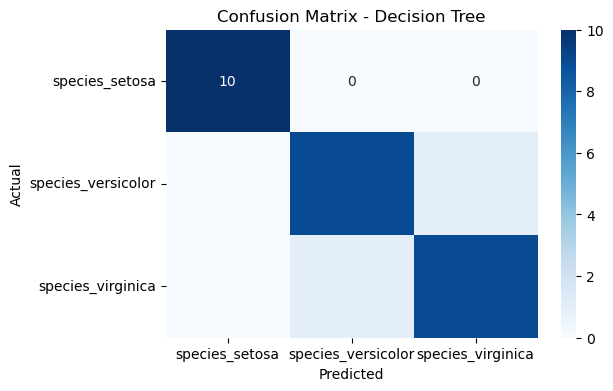

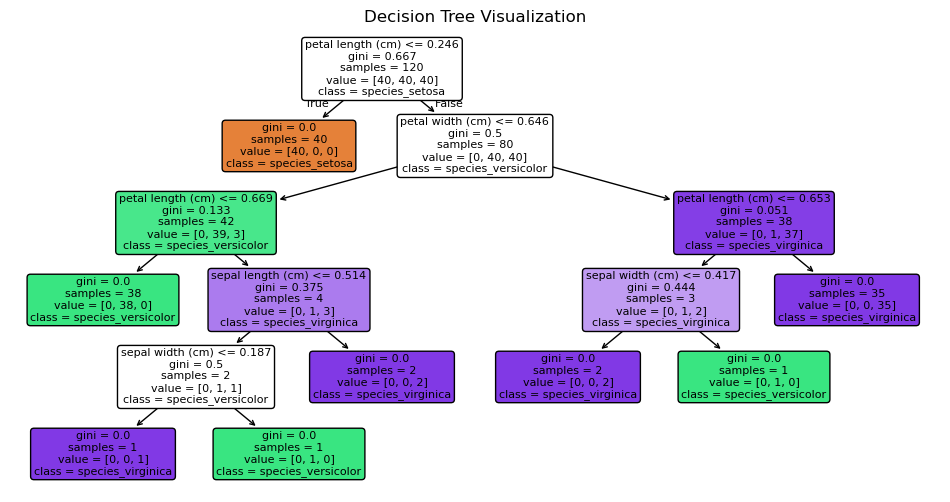

In [60]:



# --- Visualization 1: Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred, labels=y.columns)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=y.columns, yticklabels=y.columns)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("confusion_matrix.png")
plt.show()

# --- Visualization 2: Decision Tree Plot ---
plt.figure(figsize=(12,6))
plot_tree(clf,
          feature_names=X.columns,       # feature names for readability
          class_names=y.columns,         # class names instead of numbers
          filled=True,                   # color nodes by class
          rounded=True,                  # rounded node boxes
          fontsize=8)                    # smaller font for clarity
plt.title("Decision Tree Visualization")
plt.savefig("decision_tree.png")
plt.show()


### Task 3.2: Compare Decision Tree with KNN Classifier 

In [61]:
# --- Step 0: Prepare target labels ---
# If y was one-hot encoded, convert back to labels
y_labels = y.idxmax(axis=1)   # returns the column (species) name with 1

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_labels, y_test_labels = train_test_split(
    X, y_labels, test_size=0.3, random_state=42
)


In [62]:
# --- Step 1: Import KNN Classifier ---
# KNeighborsClassifier implements the KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

# --- Step 2: Initialize and Train KNN (k=5) ---
# n_neighbors=5 → The model looks at the 5 nearest neighbors 
# to decide the class of a new sample.
knn = KNeighborsClassifier(n_neighbors=5)

# Fit KNN on training data
# IMPORTANT: use label column (y_train_labels), not one-hot encoding
knn.fit(X_train, y_train_labels)

# --- Step 3: Make Predictions on Test Set ---
# The model predicts labels for the unseen test samples
y_pred_knn = knn.predict(X_test)

# --- Step 4: Evaluate Model Performance ---
# Print a detailed classification report (precision, recall, f1, support per class)
print("\nClassification Report (KNN):\n")
print(classification_report(y_test_labels, y_pred_knn))

# Print overall performance metrics
print(f"Accuracy (KNN): {accuracy_score(y_test_labels, y_pred_knn):.3f}")
print(f"Precision (KNN): {precision_score(y_test_labels, y_pred_knn, average='weighted'):.3f}")
print(f"Recall (KNN): {recall_score(y_test_labels, y_pred_knn, average='weighted'):.3f}")
print(f"F1-score (KNN): {f1_score(y_test_labels, y_pred_knn, average='weighted'):.3f}")



Classification Report (KNN):

                    precision    recall  f1-score   support

    species_setosa       1.00      1.00      1.00        19
species_versicolor       1.00      1.00      1.00        13
 species_virginica       1.00      1.00      1.00        13

          accuracy                           1.00        45
         macro avg       1.00      1.00      1.00        45
      weighted avg       1.00      1.00      1.00        45

Accuracy (KNN): 1.000
Precision (KNN): 1.000
Recall (KNN): 1.000
F1-score (KNN): 1.000


### RandomForestClassifier → an ensemble of multiple Decision Trees

In [63]:
# Step 1: Import Random Forest Classifier and Metrics ---
# Metrics → used to evaluate model performance
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, accuracy_score,
    precision_score, recall_score, f1_score
)

# --- Step 2: Initialize Random Forest Model ---
# n_estimators=100 → number of trees in the forest
# random_state=42 → ensures reproducibility of results
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# --- Step 3: Train the Random Forest ---
# Train using training features (X_train) and class labels (not one-hot)
rf.fit(X_train, y_train_labels)

# --- Step 4: Predict on Test Data ---
# The trained model predicts species labels for unseen test samples
y_pred_rf = rf.predict(X_test)

# --- Step 5: Evaluate Model Performance ---
print("Classification Report (Random Forest):\n")
# Detailed performance per class: precision, recall, F1-score, and support
print(classification_report(y_test_labels, y_pred_rf))

# Print overall evaluation metrics
print("Accuracy (RF):", round(accuracy_score(y_test_labels, y_pred_rf), 3))
print("Precision (RF):", round(precision_score(y_test_labels, y_pred_rf, average='macro'), 3))
print("Recall (RF):", round(recall_score(y_test_labels, y_pred_rf, average='macro'), 3))
print("F1-score (RF):", round(f1_score(y_test_labels, y_pred_rf, average='macro'), 3))


Classification Report (Random Forest):

                    precision    recall  f1-score   support

    species_setosa       1.00      1.00      1.00        19
species_versicolor       1.00      1.00      1.00        13
 species_virginica       1.00      1.00      1.00        13

          accuracy                           1.00        45
         macro avg       1.00      1.00      1.00        45
      weighted avg       1.00      1.00      1.00        45

Accuracy (RF): 1.0
Precision (RF): 1.0
Recall (RF): 1.0
F1-score (RF): 1.0


### Model Comparison and Reasoning

 Which Is Better and Why?
Based on the metrics:

KNN and Random Forest both outperform the clustering model, achieving perfect scores across all evaluation metrics.
Clustering, while decent (93.3% accuracy), is not as precise or reliable in distinguishing between versicolor and virginica, where it scored 0.90 in precision, recall, and F1-score.
KNN and Random Forest are supervised learning methods, meaning they learn from labeled data. This gives them a clear advantage in classification tasks.
Clustering is an unsupervised method, which tries to group data without knowing the actual labels. This makes it less accurate for classification unless the clusters align very well with the true classes.


KNN and Random Forest are better classifiers than clustering for this task.
They both achieved perfect classification results, while clustering had minor misclassifications.
The reason is that supervised models like KNN and RF use labeled data to learn decision boundaries, whereas clustering relies on patterns in the data alone.

### Final Summary 
In this experiment, the Decision Tree achieved an accuracy of 93.3%, misclassifying some versicolor and virginica samples, showing its tendency to overfit. Both KNN (k=5) and Random Forest reached 100% accuracy, precision, recall, and F1-score, perfectly classifying all samples. While KNN works exceptionally well on the Iris dataset due to its small size and clean separation of species, it is less scalable and more sensitive to noisy data in real-world scenarios. On the other hand, Random Forest, by averaging multiple decision trees, provides robustness, stability, and better generalization for larger, more complex datasets. Therefore, although both KNN and Random Forest perform equally well here, Random Forest is the more reliable choice for practical, real-world classification tasks.